<a href="https://colab.research.google.com/github/luc-perso/covid-19-xRay/blob/main/codes_ByAmani/VGG16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!unzip -q '/content/drive/MyDrive/data_equalize.zip' -d '/content/'

All


In [11]:
lungdir ='/content/data_equalize/Lung Segmentation Data'
infectdir ='/content/data_equalize/Infection Segmentation Data'

train= '/Train'
test= '/Test'
val= '/Val'

covid= '/COVID-19/images'
noncovid='/Non-COVID/images'
normal= '/Normal/images'




In [21]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np

In [9]:
n_class=3
batch_size = 32

base_model = VGG16(weights='imagenet', include_top=False) 

for layer in base_model.layers: 
    layer.trainable = False

model = Sequential()
model.add(base_model) 
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class + 1, activation='softmax'))

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                      

In [12]:
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        horizontal_flip = True
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)
batch_size = 32


train_generator = train_data_generator.flow_from_directory(directory=lungdir+train,
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

test_generator = test_data_generator.flow_from_directory(directory=lungdir+test,
                                                         class_mode ="sparse",
                                                        target_size = (224 , 224), 
                                                        batch_size = batch_size)


Found 21715 images belonging to 3 classes.
Found 6787 images belonging to 3 classes.


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [16]:
history = model.fit_generator(generator=train_generator, 
                                epochs = 5,
                                steps_per_epoch = 1310//batch_size,
                                validation_data = test_generator,
                                validation_steps = 334//batch_size
                                )


<ipython-input-16-d8d1cf1e1c63>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/5
40/40 [==============================] - 846s 21s/step - loss: 0.8813 - acc: 0.5883 - val_loss: 0.9840 - val_acc: 0.5781
Epoch 2/5
40/40 [==============================] - 845s 21s/step - loss: 0.8380 - acc: 0.6211 - val_loss: 0.7901 - val_acc: 0.6812
Epoch 3/5
40/40 [==============================] - 931s 23s/step - loss: 0.8884 - acc: 0.5789 - val_loss: 0.6941 - val_acc: 0.7375
Epoch 4/5
40/40 [==============================] - 866s 22s/step - loss: 0.8545 - acc: 0.6148 - val_loss: 0.6186 - val_acc: 0.7563
Epoch 5/5
40/40 [==============================] - 863s 22s/step - loss: 0.8467 - acc: 0.6078 - val_loss: 0.5606 - val_acc: 0.7781


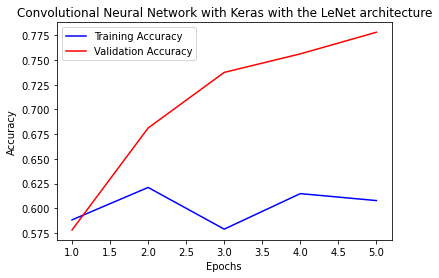

In [23]:
#
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1 , 6, 1),
         history.history['acc'],
         label = 'Training Accuracy',
         color = 'blue')

plt.plot(np.arange(1 , 6, 1),
         history.history['val_acc'], 
         label = 'Validation Accuracy',
         color = 'red')

plt.title('Convolutional Neural Network with Keras with the LeNet architecture')
plt.legend()
fig = plt.gcf()
fig.savefig('fig_VGG16_1024_512.pdf')
plt.show()



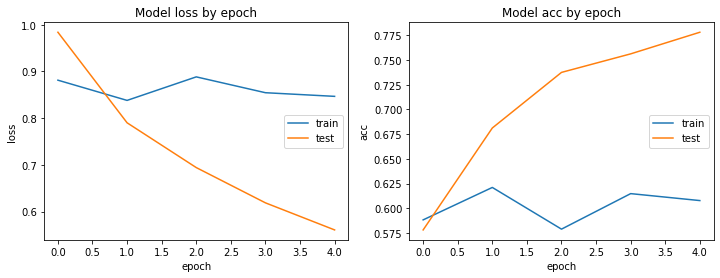

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()